In [311]:
import numpy as np

from matplotlib import pyplot as plt 
 
from wpg.wavefront import Wavefront
from wpg.beamline import Beamline

from wpg.source import sase_pulse
from wpg.optical_elements import Drift, Aperture
from wpg.wpg_uti_oe import propagation_parameters

from midsim.source import analytical_pulse_divergence, analytical_pulse_width

In [293]:
from matplotlib.colors import LogNorm, Normalize

def plot_wfr(wfr, logscale=False):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    
    intensity = wfr.get_intensity().sum(-1)
    
    if logscale:
        norm = LogNorm(vmin=intensity[intensity > 0].min(), vmax=intensity.max())
    else:
        norm = Normalize(vmin=intensity.min(), vmax=intensity.max())
    
    try:
        extent =  [a*1e3 for a in [wfr.xMin, wfr.xMax, wfr.yMin, wfr.yMax]]
        
    except(TypeError):
        extent =  [a*1e3 for a in [wfr.qxMin, wfr.qxMax, wfr.qyMin, wfr.qyMax]]

    im = ax.imshow(intensity,
                   extent=extent,
                   cmap='afmhot',
                   norm=norm)
    
    ax.set_xlabel('x (mm)')
    ax.set_xlabel('y (mm)')
    #fig.colorbar(im, ax=ax, orientation='vertical')


0.7271780906660328


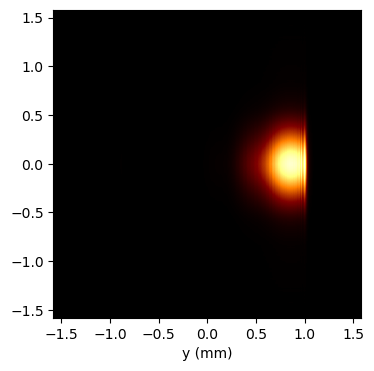

In [366]:
x = y = np.linspace(-450e-06, 450e-06, 1024)
t = np.linspace(-50e-15, 50e-15, 2)

photon_energy = 10e3

wfr = sase_pulse(x=x,
                 y=y,
                 t=t,
                 photon_energy=photon_energy,
                 pulse_energy=1e-03,
                 pulse_duration=15e-15,
                 bandwidth=1e-12,
                 sigma=analytical_pulse_width(photon_energy),
                 div=analytical_pulse_divergence(photon_energy),
                 x0=0.0,
                 y0=0.0,
                 t0=0.0,
                 theta_x=1e-03,
                 theta_y=0.0,
                 domain='freq',
                 polarization = 'horizontal')

bl = Beamline()

bl.append(Drift(290), propagation_parameters(3.5,1,3.5,1,mode='fresnel'))

bl.append(M1, propagation_parameters(1,1,1,1,mode = 'fresnel'))
bl.append(Drift(11), propagation_parameters(1,1,1,1,mode='fresnel'))
bl.append(M2, propagation_parameters(1,1,1,1,mode = 'fresnel'))

bl.append(Drift(11), propagation_parameters(1,1,1,1,mode='fresnel'))



bl.propagate(wfr)

plot_wfr(wfr, logscale = False)
exp_sigma = analytical_pulse_width(photon_energy) + 290*analytical_pulse_divergence(photon_energy)*1e3
print(exp_sigma)

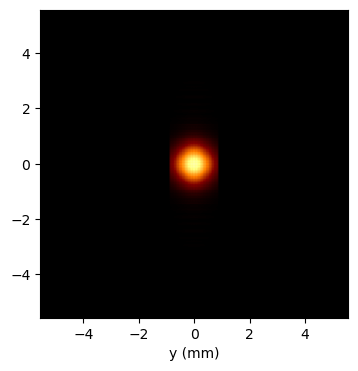

In [354]:
bl.propagate(wfr)
plot_wfr(wfr, logscale = False)
